In [1]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps

url = "https://data.lacity.org/resource/2nrs-mtv8.json"
response = requests.get(url).json()

In [2]:
file_one = "../Resources/crime_data.csv"
file_one_df = pd.read_csv(file_one)

In [3]:
crime_df = pd.DataFrame(file_one_df)
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [4]:
# Formatting the "Date Occ" row to be more usable
crime_df["DATE OCC"]=pd.to_datetime(crime_df["DATE OCC"])
# Creating cleaned up months and year columns
crime_df["Month Occured"] = [date.month for date in crime_df["DATE OCC"]]
crime_df["Year Occured"] = [date.year for date in crime_df["DATE OCC"]]
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,1,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,1,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,9,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,1,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,1,2020


In [5]:
# How many criminal activities were reported in 2020?
twenty_crime=crime_df.loc[crime_df["Year Occured"]==2020,:]
# 197,067 criminal incidents were reported in 2020
twenty_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,1,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,1,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,9,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,1,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197062,200814793,10/02/2020 12:00:00 AM,2020-10-02,1330,8,West LA,853,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,440.0,998.0,NaN,NaN,11400 SANTA MONICA BL,NaN,34.0457,-118.4511,10,2020
197063,210612830,07/17/2021 12:00:00 AM,2020-12-15,1200,6,Hollywood,659,1,310,BURGLARY,...,310.0,NaN,NaN,NaN,5100 W SUNSET BL,NaN,34.0981,-118.3010,12,2020
197064,200315957,08/18/2020 12:00:00 AM,2020-08-18,1130,3,Southwest,362,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,4800 OBAMA BL,NaN,34.0214,-118.3486,8,2020
197065,211009262,06/20/2021 12:00:00 AM,2020-07-11,1000,10,West Valley,1065,1,310,BURGLARY,...,310.0,NaN,NaN,NaN,18000 VENTURA BL,NaN,34.1675,-118.5226,7,2020


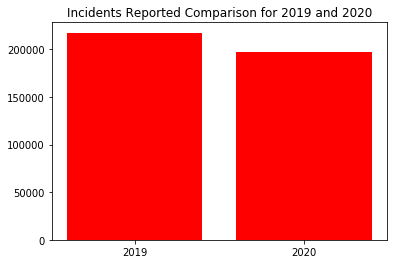

In [6]:
# Comparing number of crimes reported in 2019 vs 2020
x_axis=[2019,2020]
y_axis=[217535,197067]
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,x_axis)
plt.bar(x_axis,y_axis,color='r')
plt.title("Incidents Reported Comparison for 2019 and 2020")
plt.savefig("../Graphs and Plots/TwoYearComparison.png")

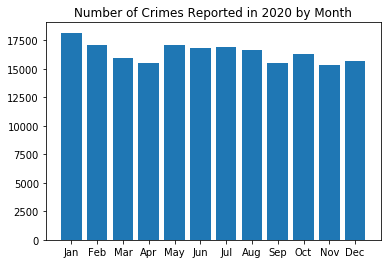

In [7]:
# Creating a bar chart to display reports per month in 2020
months=twenty_crime.groupby("Month Occured").count()
x_axis=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y_axis=months["AREA NAME"]
plt.bar(x_axis,y_axis)
plt.title("Number of Crimes Reported in 2020 by Month")
plt.savefig("../Graphs and Plots/2020byMonth.png")

In [8]:
# Creating path to read 2019 crime csv
file_two = "../Resources/2019_crime_data.csv"
file_two_df = pd.read_csv(file_two)
file_two_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,190805874,2/12/2019 0:00,2/12/2019 0:00,1900,8,West LA,857,310,BURGLARY,34,...,P,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,1500 BEVERWIL DR,NaN,34.0524,-118.3986
1,191213477,5/12/2019 0:00,5/12/2019 0:00,200,12,77th Street,1203,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,...,H,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,1700 W 45TH ST,NaN,34.0028,-118.3089
2,190409679,5/10/2019 0:00,5/10/2019 0:00,330,4,Hollenbeck,489,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,...,H,PARKING LOT,304.0,CLUB/BAT,IC,Invest Cont,1300 S SOTO ST,NaN,34.0263,-118.2196
3,191510263,5/1/2019 0:00,4/30/2019 0:00,1610,15,N Hollywood,1599,624,BATTERY - SIMPLE ASSAULT,53,...,O,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2800 MONTCALM AV,NaN,34.1223,-118.3563
4,190320119,8/30/2019 0:00,8/30/2019 0:00,1815,3,Southwest,354,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,...,B,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,2700 OBAMA BL,NaN,34.0222,-118.3227


In [9]:
# Importing 2019 crime data csv and saving as our second dataframe
nineteen_crime_df = pd.DataFrame(file_two_df)
nineteen_crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,190805874,2/12/2019 0:00,2/12/2019 0:00,1900,8,West LA,857,310,BURGLARY,34,...,P,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,1500 BEVERWIL DR,NaN,34.0524,-118.3986
1,191213477,5/12/2019 0:00,5/12/2019 0:00,200,12,77th Street,1203,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,...,H,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,1700 W 45TH ST,NaN,34.0028,-118.3089
2,190409679,5/10/2019 0:00,5/10/2019 0:00,330,4,Hollenbeck,489,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,...,H,PARKING LOT,304.0,CLUB/BAT,IC,Invest Cont,1300 S SOTO ST,NaN,34.0263,-118.2196
3,191510263,5/1/2019 0:00,4/30/2019 0:00,1610,15,N Hollywood,1599,624,BATTERY - SIMPLE ASSAULT,53,...,O,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2800 MONTCALM AV,NaN,34.1223,-118.3563
4,190320119,8/30/2019 0:00,8/30/2019 0:00,1815,3,Southwest,354,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,...,B,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,2700 OBAMA BL,NaN,34.0222,-118.3227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217529,191904534,1/12/2019 0:00,1/12/2019 0:00,50,19,Mission,1951,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",42,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,15400 CHATSWORTH ST,NaN,34.2646,-118.4673
217530,190325632,12/1/2019 0:00,11/30/2019 0:00,1900,3,Southwest,331,330,BURGLARY FROM VEHICLE,34,...,H,DRIVEWAY,NaN,NaN,IC,Invest Cont,2900 S RIMPAU BL,NaN,34.0278,-118.3508
217531,191321935,11/7/2019 0:00,10/3/2019 0:00,100,13,Newton,1364,354,THEFT OF IDENTITY,30,...,B,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4900 S CENTRAL AV,NaN,33.9989,-118.2565
217532,190912178,6/12/2019 0:00,6/11/2019 0:00,600,9,Van Nuys,909,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,...,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,7400 WOODMAN AV,NaN,34.2049,-118.4313


In [10]:
# Formatting the "Date Occ" row to be more usable
nineteen_crime_df["DATE OCC"]=pd.to_datetime(nineteen_crime_df["DATE OCC"])
# Creating cleaned up months and year columns
nineteen_crime_df["Month Occured"] = [date.month for date in nineteen_crime_df["DATE OCC"]]
nineteen_crime_df["Year Occured"] = [date.year for date in nineteen_crime_df["DATE OCC"]]
nineteen_crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured
0,190805874,2/12/2019 0:00,2019-02-12,1900,8,West LA,857,310,BURGLARY,34,...,NaN,NaN,IC,Invest Cont,1500 BEVERWIL DR,NaN,34.0524,-118.3986,2,2019
1,191213477,5/12/2019 0:00,2019-05-12,200,12,77th Street,1203,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,...,NaN,NaN,IC,Invest Cont,1700 W 45TH ST,NaN,34.0028,-118.3089,5,2019
2,190409679,5/10/2019 0:00,2019-05-10,330,4,Hollenbeck,489,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,...,304.0,CLUB/BAT,IC,Invest Cont,1300 S SOTO ST,NaN,34.0263,-118.2196,5,2019
3,191510263,5/1/2019 0:00,2019-04-30,1610,15,N Hollywood,1599,624,BATTERY - SIMPLE ASSAULT,53,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2800 MONTCALM AV,NaN,34.1223,-118.3563,4,2019
4,190320119,8/30/2019 0:00,2019-08-30,1815,3,Southwest,354,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,...,511.0,VERBAL THREAT,IC,Invest Cont,2700 OBAMA BL,NaN,34.0222,-118.3227,8,2019


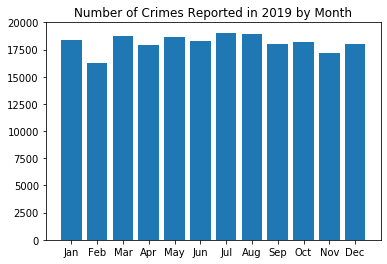

In [11]:
# Creating a bar chart to display reports per month in 2019
months=nineteen_crime_df.groupby("Month Occured").count()
x_axis=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y_axis=months["AREA NAME"]
plt.bar(x_axis,y_axis)
plt.title("Number of Crimes Reported in 2019 by Month")
plt.savefig("../Graphs and Plots/2019byMonth.png")
plt.show()

In [12]:
# Detecting the top 8 crimes of 2020
twenty_crime["Crm Cd Desc"].value_counts().head(8)

VEHICLE - STOLEN                                           20725
BATTERY - SIMPLE ASSAULT                                   16292
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12884
BURGLARY                                                   12773
BURGLARY FROM VEHICLE                                      12675
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             11520
INTIMATE PARTNER - SIMPLE ASSAULT                          10795
THEFT PLAIN - PETTY ($950 & UNDER)                         10781
Name: Crm Cd Desc, dtype: int64

In [13]:
# Detecting the top 8 crimes of 2019
nineteen_crime_df["Crm Cd Desc"].value_counts().head(8)

BATTERY - SIMPLE ASSAULT                                   18936
BURGLARY FROM VEHICLE                                      16659
VEHICLE - STOLEN                                           15350
THEFT PLAIN - PETTY ($950 & UNDER)                         15341
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12840
BURGLARY                                                   12625
INTIMATE PARTNER - SIMPLE ASSAULT                          12096
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             10815
Name: Crm Cd Desc, dtype: int64

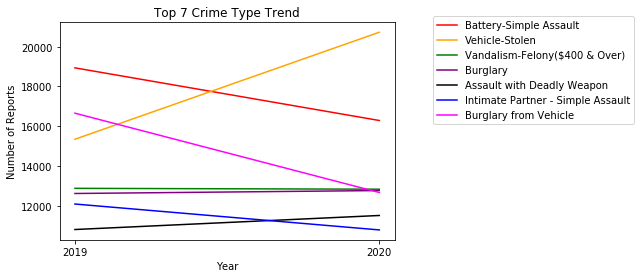

In [14]:
# Creating crime type trend between 2019 and 2020
x_axis=["2019","2020"]
Battery=[18936,16292]
Stolen_Vehicles=[15350,20725]
Felony_Vandalism=[12884,12840]
Burglary=[12625,12773]
Deadly_Assault=[10815,11520]
Partner_Assault=[12096,10795]
Vehicle_Burglary=[16659,12675]
BSA, = plt.plot(x_axis,Battery,color="red",label="Battery-Simple Assault")
SV, = plt.plot(x_axis,Stolen_Vehicles,color="orange",label="Vehicle-Stolen")
FV, = plt.plot(x_axis,Felony_Vandalism,color="green",label="Vandalism-Felony($400 & Over)")
B, = plt.plot(x_axis,Burglary,color="purple",label="Burglary")
DA, = plt.plot(x_axis,Deadly_Assault,color="black",label="Assault with Deadly Weapon")
PA, = plt.plot(x_axis,Partner_Assault,color="blue",label="Intimate Partner - Simple Assault")
VB, = plt.plot(x_axis,Vehicle_Burglary,color="magenta",label="Burglary from Vehicle")
plt.title("Top 7 Crime Type Trend")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.savefig("../Graphs and Plots/Top7CrimeTypebyYear.png")

In [15]:
#Looking at the trend lines, there is a shocking increase in stolen vehicle criminal cases, let's take a deeper look into month reports in the year 2020 to see it's peak time
stolen_vehicle = twenty_crime.loc[twenty_crime["Crm Cd Desc"] == "VEHICLE - STOLEN"]
stolen_vehicle

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured
15,201811813,05/28/2020 12:00:00 AM,2020-05-25,200,18,Southeast,1851,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,MENLO AV,130TH ST,33.9144,-118.2894,5,2020
24,201713253,09/15/2020 12:00:00 AM,2020-09-14,1305,17,Devonshire,1776,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,16700 LABRADOR ST,NaN,34.2493,-118.4965,9,2020
27,200505212,01/29/2020 12:00:00 AM,2020-01-26,1200,5,Harbor,529,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,E,BROAD,33.7753,-118.2456,1,2020
32,200117988,09/15/2020 12:00:00 AM,2020-09-03,2000,1,Central,111,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,500 N FIGUEROA ST,NaN,34.0615,-118.2470,9,2020
50,201312607,06/21/2020 12:00:00 AM,2020-06-21,30,13,Newton,1321,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,100 E 24TH ST,NaN,34.0266,-118.2676,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196893,201819448,10/24/2020 12:00:00 AM,2020-10-24,1600,18,Southeast,1826,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,1600 E 103RD ST,NaN,33.9485,-118.2461,10,2020
196963,200917938,12/01/2020 12:00:00 AM,2020-12-01,1645,9,Van Nuys,964,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4389,12,2020
196979,201917528,11/30/2020 12:00:00 AM,2020-11-29,2100,19,Mission,1905,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,13900 FOOTHILL BL,NaN,34.3155,-118.4343,11,2020
196985,201516409,10/17/2020 12:00:00 AM,2020-10-10,1800,15,N Hollywood,1549,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,10700 BURBANK BL,NaN,34.1721,-118.3643,10,2020


In [16]:
# Grouping stolen vehicle cases by month to see it's monthly count
stolen_vehicle_month=stolen_vehicle.groupby("Month Occured")
print(stolen_vehicle_month)
stolen_vehicle_month.count()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occured
Month Occured,,,,,,,,,,,,,,,,,,,,,
1,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,...,1405,1405,3,0,0,1405,325,1405,1405,1405
2,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,...,1278,1278,3,0,0,1278,283,1278,1278,1278
3,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,...,1473,1473,5,0,0,1473,322,1473,1473,1473
4,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,...,1834,1834,2,0,0,1834,356,1834,1834,1834
5,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,...,1848,1848,6,0,0,1848,368,1848,1848,1848
6,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090,...,2090,2090,6,0,0,2090,376,2090,2090,2090
7,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,...,1983,1983,5,0,0,1983,418,1983,1983,1983
8,1837,1837,1837,1837,1837,1837,1837,1837,1837,1837,...,1837,1837,5,0,0,1837,359,1837,1837,1837
9,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,...,1616,1616,7,0,0,1616,363,1616,1616,1616


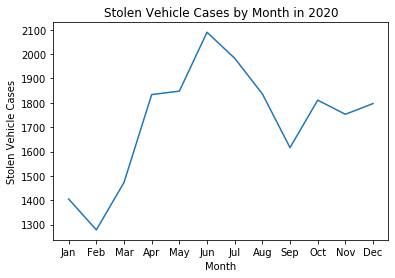

In [17]:
# Creating a monthly stolen vehicle case count line graph for 2020
x_axis=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y_axis=[1405,1278,1473,1834,1848,2090,1983,1837,1616,1811,1753,1797]
plt.plot(x_axis,y_axis)
plt.xlabel("Month")
plt.ylabel("Stolen Vehicle Cases")
plt.title("Stolen Vehicle Cases by Month in 2020")
plt.savefig("../Graphs and Plots/2020StolenVehicleCases.png")

In [18]:
# Repeating the same step above with 2019 data
stolen_vehicletwo = nineteen_crime_df.loc[nineteen_crime_df["Crm Cd Desc"] == "VEHICLE - STOLEN"]
stolen_vehicletwo_month=stolen_vehicletwo.groupby("Month Occured")
stolen_vehicletwo_month.count()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Year Occured
Month Occured,,,,,,,,,,,,,,,,,,,,,
1,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,...,1396,0,0,1396,1396,1396,345,1396,1396,1396
2,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,...,1196,0,0,1196,1196,1196,288,1196,1196,1196
3,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,...,1351,0,0,1351,1352,1352,298,1352,1352,1352
4,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,...,1209,0,0,1210,1210,1210,295,1210,1210,1210
5,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,...,1268,0,0,1268,1268,1268,325,1268,1268,1268
6,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,...,1166,0,0,1166,1166,1166,279,1166,1166,1166
7,1231,1231,1231,1231,1231,1231,1231,1231,1231,1231,...,1231,1,1,1231,1231,1231,298,1231,1231,1231
8,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,...,1304,0,0,1304,1304,1304,333,1304,1304,1304
9,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,...,1189,1,1,1189,1189,1189,287,1189,1189,1189


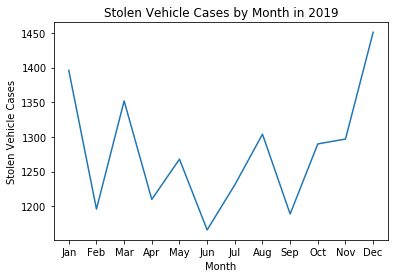

In [19]:
# # Creating a monthly stolen vehicle case count line graph for 2019
x_axis=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y_axis=[1396,1196,1352,1210,1268,1166,1231,1304,1189,1290,1297,1451]
plt.plot(x_axis,y_axis)
plt.xlabel("Month")
plt.ylabel("Stolen Vehicle Cases")
plt.title("Stolen Vehicle Cases by Month in 2019")
plt.savefig("../Graphs and Plots/2019StolenVehicleCases.png")

In [20]:
# Using statistical analysis to look at the average monthly cases reported in 2020
twenty_mean=twenty_crime["Crm Cd Desc"].value_counts().mean()
# On average in 2020, 1527 incidents occured monthly
twenty_mean


1527.6511627906978

In [21]:
# Using statistical analysis to look at the average monthly cases reported in 2019
nineteen_mean=nineteen_crime_df["Crm Cd Desc"].value_counts().mean()
# On average in 2020, 1527 incidents occured monthly
nineteen_mean

1587.8394160583941

In [22]:
#creating file paths for each dataset (second)
file_path = '../Resources/crime_data.csv'
file_path2 = '../Resources/2019_crime_data.csv'
file = pd.read_csv(file_path)
file2 = pd.read_csv(file_path2)

data = [file['Date Rptd'], file['DATE OCC'], file['TIME OCC'], file['AREA NAME'], file['Crm Cd Desc'], 
       file['Vict Age'],file['Vict Sex'], file['Vict Descent'], file['Premis Desc'], file['Weapon Desc'], 
       file['LOCATION'], file['LAT'], file['LON']]
data2 = [file2['Date Rptd'], file2['DATE OCC'], file2['TIME OCC'], file2['AREA NAME'], file2['Crm Cd Desc'], 
       file2['Vict Age'],file2['Vict Sex'], file2['Vict Descent'], file2['Premis Desc'], file2['Weapon Desc'], 
       file2['LOCATION'], file2['LAT'], file2['LON']]

#creating dataframes for each
#df = 2020 | df2019 = 2019
df = pd.DataFrame(data).T
df2019 = pd.DataFrame(data2).T

df["DATE OCC"]=pd.to_datetime(df["DATE OCC"])
df['Month'] = [date.month for date in df["DATE OCC"]]
df['Year'] = [date.year for date in df["DATE OCC"]]
#df
df2020 = df.loc[df['Year']==2020]
#df2020
df2019["DATE OCC"]=pd.to_datetime(df2019["DATE OCC"])
df2019['Month'] = [date.month for date in df2019["DATE OCC"]]
df2019['Year'] = [date.year for date in df2019["DATE OCC"]]

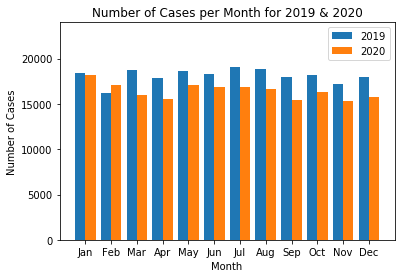

In [23]:
months2019 = df2019['Month'].value_counts()
months2020 = df2020['Month'].value_counts()

X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
m2019 = [months2019[1], months2019[2], months2019[3], months2019[4], months2019[5], months2019[6], 
         months2019[7], months2019[8], months2019[9], months2019[10], months2019[11], months2019[12] ]
m2020 = [months2020[1], months2020[2], months2020[3], months2020[4], months2020[5], months2020[6], 
         months2020[7], months2020[8], months2020[9], months2020[10], months2020[11], months2020[12] ]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, m2019, 0.4, label = '2019')
plt.bar(X_axis + 0.2, m2020, 0.4, label = '2020')
  
plt.xticks(X_axis, X)
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Month for 2019 & 2020")
plt.legend()
plt.ylim(0, 24000)

#plt.savefig('../../Graphs and Plots/a1.png')
plt.show()

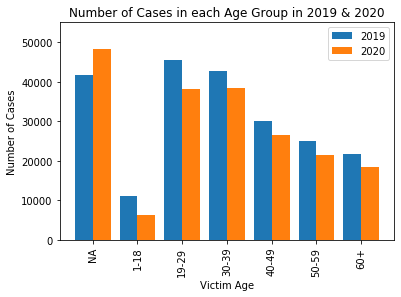

In [24]:
#bar chart refering to number of crimes occured where victim is of a certain age group 2019
age_sort2019 = df2019.sort_values(by = ['Vict Age'])
age_count2019 = age_sort2019['Vict Age'].value_counts()
age_data2019 = age_sort2019['Vict Age']
age_data2019 = age_data2019.reset_index(drop=True)


not_listed19 = 0
ten19 = 0
twenty19 = 0
thirty19 = 0
forty19 = 0
fifty19 = 0
older19 = 0

for age in age_data2019:
    
    if age <= 0:
        not_listed19 += 1
    elif age < 19:
        ten19 += 1
    elif age < 30:
        twenty19 += 1
    elif age < 40:
        thirty19 += 1
    elif age < 50:
        forty19 += 1
    elif age < 60:
        fifty19 += 1
    else:
        older19 += 1

#bar chart refering to number of crimes occured where victim is of a certain age group 2020
age_sort20 = df2020.sort_values(by = ['Vict Age'])
age_count20 = age_sort20['Vict Age'].value_counts()
age_data20 = age_sort20['Vict Age']
age_data20 = age_data20.reset_index(drop=True)


not_listed20 = 0
ten20 = 0
twenty20 = 0
thirty20 = 0
forty20 = 0
fifty20 = 0
older20 = 0

for age20 in age_data20:
    
    if age20 <= 0:
        not_listed20 += 1
    elif age20 < 19:
        ten20 += 1
    elif age20 < 30:
        twenty20 += 1
    elif age20 < 40:
        thirty20 += 1
    elif age20 < 50:
        forty20 += 1
    elif age20 < 60:
        fifty20 += 1
    else:
        older20 += 1


x = ['NA', '1-18', '19-29', '30-39', '40-49', '50-59', '60+']
a2019 = [not_listed19, ten19, twenty19, thirty19, forty19, fifty19, older19]
a2020 = [not_listed20, ten20, twenty20, thirty20, forty20, fifty20, older20]

X_axis = np.arange(len(x))

width = 0.4
fig, age = plt.subplots()
rects1 = age.bar(X_axis - width/2, a2019, width, label=2019)
rects2 = age.bar(X_axis + width/2, a2020, width, label=2020)

plt.xticks(X_axis, x, rotation = 'vertical')
plt.xlabel('Victim Age')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in each Age Group in 2019 & 2020')

#age.bar_label(rects1, padding=3, rotation = 'vertical')
#age.bar_label(rects2, padding=3, rotation = 'vertical')

plt.ylim(0, 55000)
plt.legend()
#plt.savefig('../../Graphs and Plots/a2.png')
plt.show()

In [25]:
#go into depth 
#what type of crimes 
agetable = pd.DataFrame({'Age Group':x, '2019':a2019, '2020':a2020})
agedf = agetable.set_index('Age Group')
agedf

,2019,2020
Age Group,,
NA,41658,48107
1-18,11012,6313
19-29,45358,38026
30-39,42686,38378
40-49,30144,26464
50-59,24956,21433
60+,21720,18346


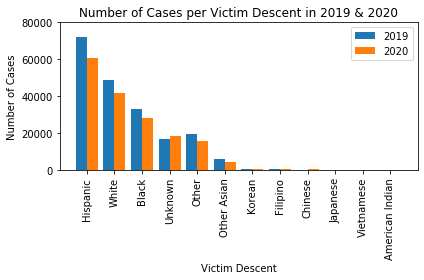

In [26]:
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian 
                #F - Filipino G - Guamanian H - Hispanic/Latin/Mexican 
                #I - American Indian/Alaskan Native J - Japanese K - Korean 
                #L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
                #V - Vietnamese W - White X - Unknown Z - Asian Indian
race2019 = df2019['Vict Descent'].value_counts().head(12)
race2020 = df2020['Vict Descent'].value_counts().head(12)

x = ['Hispanic', 'White', 'Black', 'Unknown', 'Other', 'Other Asian', 'Korean', 
     'Filipino', 'Chinese', 'Japanese', 'Vietnamese', 'American Indian']
r2019 = [race2019['H'], race2019['W'], race2019['B'], race2019['X'], race2019['O'], race2019['A'], 
         race2019['K'], race2019['F'], race2019['C'], race2019['J'], race2019['V'], race2019['I'] ]
r2020 = [race2020['H'], race2020['W'], race2020['B'], race2020['X'], race2020['O'], race2020['A'], 
         race2020['K'], race2020['F'], race2020['C'], race2020['J'], race2020['V'], race2020['I'] ]

x_axis = np.arange(len(x))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, r2019, width, label=2019)
rects2 = ax.bar(x_axis + width/2, r2020, width, label=2020)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Victim Descent')
ax.set_title('Number of Cases per Victim Descent in 2019 & 2020')
ax.set_xticks(x_axis)
ax.set_xticklabels(x, rotation = 'vertical')
ax.legend()

#ax.bar_label(rects1, padding=3, rotation = 'vertical')
#ax.bar_label(rects2, padding=3, rotation = 'vertical')
plt.ylim(0, 80000)
fig.tight_layout()

#plt.savefig('../../Graphs and Plots/victimdescent20192020wholenobarlabel.png')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

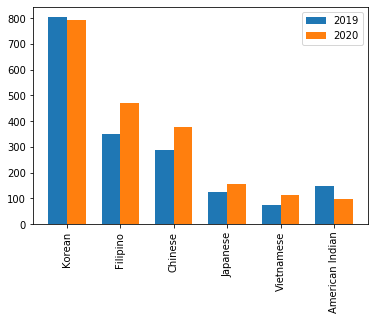

In [27]:
#zoomed in graph of bottom 6 descents
xy = ['Korean','Filipino', 'Chinese', 'Japanese', 'Vietnamese', 'American Indian']

r2019x = [ race2019['K'], race2019['F'], race2019['C'], 
         race2019['J'], race2019['V'], race2019['I'] ]
r2020y = [ race2020['K'], race2020['F'], race2020['C'], 
         race2020['J'], race2020['V'], race2020['I'] ]

x_axisx = np.arange(len(xy))  # the label locations
width = 0.35  # the width of the bars

fig, axy = plt.subplots()
rects1x = axy.bar(x_axisx - width/2, r2019x, width, label=2019)
rects2x = axy.bar(x_axisx + width/2, r2020y, width, label=2020)

# Add some text for labels, title and custom x-axis tick labels, etc.
#axy.set_ylabel('Number of Cases')
#axy.set_xlabel('Victim Descent')
#axy.set_title('Number of Cases per Victim Descent in 2019 & 2020')
axy.set_xticks(x_axisx)
axy.set_xticklabels(xy, rotation = 'vertical')
axy.legend()

axy.bar_label(rects1x, padding=3, rotation = 'vertical')
axy.bar_label(rects2x, padding=3, rotation = 'vertical')
plt.ylim(0, 1000)
fig.tight_layout()

#plt.savefig('../../Graphs and Plots/victimdescent20192020bottom7nolabel.png')
plt.show()

In [ ]:
vddf = pd.DataFrame({'Descent':x, '2019':r2019, '2020':r2020})
vddf.set_index('Descent')

In [41]:
df2019.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON,Month,Year
0,2/12/2019 0:00,2019-02-12,1900,West LA,BURGLARY,34,M,P,SINGLE FAMILY DWELLING,NaN,1500 BEVERWIL DR,34.0524,-118.399,2,2019
1,5/12/2019 0:00,2019-05-12,200,77th Street,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,F,H,"VEHICLE, PASSENGER/TRUCK",NaN,1700 W 45TH ST,34.0028,-118.309,5,2019
2,5/10/2019 0:00,2019-05-10,330,Hollenbeck,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,M,H,PARKING LOT,CLUB/BAT,1300 S SOTO ST,34.0263,-118.22,5,2019
3,5/1/2019 0:00,2019-04-30,1610,N Hollywood,BATTERY - SIMPLE ASSAULT,53,F,O,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",2800 MONTCALM AV,34.1223,-118.356,4,2019
4,8/30/2019 0:00,2019-08-30,1815,Southwest,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,F,B,SINGLE FAMILY DWELLING,VERBAL THREAT,2700 OBAMA BL,34.0222,-118.323,8,2019


In [39]:
# Crime Description of Hispanic victims in 2020
h_ethn_20 = df2020.loc[df2020["Vict Descent"] == "H"]
hispanic_crime_2020 = h_ethn_20["Crm Cd Desc"].value_counts()
h_crime_2020 = hispanic_crime_2019.head(12)

BATTERY - SIMPLE ASSAULT                                   7819
INTIMATE PARTNER - SIMPLE ASSAULT                          5593
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             5548
BURGLARY FROM VEHICLE                                      4168
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    3953
ROBBERY                                                    2976
THEFT PLAIN - PETTY ($950 & UNDER)                         2639
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                   2606
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            2071
BURGLARY                                                   2038
THEFT OF IDENTITY                                          1924
CRIMINAL THREATS - NO WEAPON DISPLAYED                     1838
Name: Crm Cd Desc, dtype: int64

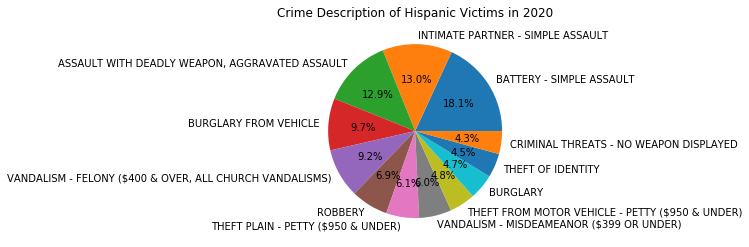

In [40]:
# Pie Chart of Crime Description of Hispanic Victims in 2020
h_crime_2020.plot(kind="pie", y = "Sex", autopct = "%1.1f%%")

plt.ylabel('')
plt.title("Crime Description of Hispanic Victims in 2020")

plt.savefig('../../Graphs and Plots/hispanic_victims_crime_description2020.png')
# Show plot
plt.show()

In [42]:
# Crime Description of Hispanic victims in 2019
h_ethn_19 = df2019.loc[df2019["Vict Descent"] == "H"]
hispanic_crime_2019 = h_ethn_19["Crm Cd Desc"].value_counts()
h_crime_2019 = hispanic_crime_2019.head(12)

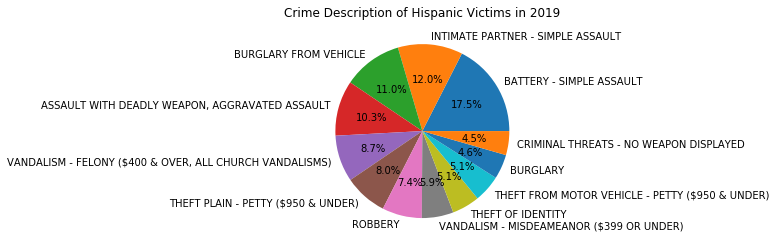

In [46]:
# Pie Chart of Crime Description of Hispanic Victims in 2019
h_crime_2019.plot(kind="pie", y = "Sex", autopct = "%1.1f%%")

plt.ylabel('')
plt.title("Crime Description of Hispanic Victims in 2019")

# plt.savefig('../../Graphs and Plots/hispanic_victims_crime_description2019.png')
# Show plot
plt.show()